In [ ]:
# Uncomment the line corresponding to your "runtime type" to run in Google Colab

# CPU:
# !pip install pydub torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# GPU:
# !pip install pydub torch==1.7.0+cu101 torchvision==0.8.1+cu101 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys

import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from torchaudio.datasets import SPEECHCOMMANDS
import os


class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]


# Create training and testing split of the data. We do not use validation in this tutorial.
train_set = SubsetSC("training")
test_set = SubsetSC("testing")

waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

  0%|          | 0.00/2.26G [00:00<?, ?B/s]

In [ ]:
Train_File = open("/content/drive/MyDrive/train_list.txt", "r")

# reading the file
data = Train_File.read()

# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
Train_list = data.split("\n")

# printing the data
print(Train_list)

j=0
TrainNew=[]
for i, val in enumerate(train_set):
    if Train_list[j]!='' and int(Train_list[j])==i:
        TrainNew.append(val)
        j=j+1


['3', '9', '15', '22', '25', '28', '34', '43', '62', '74', '84', '86', '88', '90', '91', '92', '98', '100', '102', '108', '112', '116', '120', '121', '122', '133', '135', '142', '153', '157', '158', '159', '174', '179', '184', '185', '214', '238', '239', '255', '276', '284', '289', '295', '298', '303', '307', '308', '313', '318', '334', '343', '356', '363', '387', '392', '397', '408', '427', '432', '448', '454', '455', '462', '476', '484', '486', '506', '512', '520', '523', '527', '530', '531', '536', '549', '550', '559', '568', '572', '578', '579', '581', '592', '605', '609', '613', '617', '623', '628', '647', '648', '663', '664', '670', '676', '679', '688', '691', '701', '725', '729', '730', '741', '750', '754', '759', '760', '762', '777', '778', '783', '786', '788', '790', '795', '815', '817', '819', '824', '825', '830', '870', '885', '889', '912', '918', '926', '933', '941', '949', '953', '972', '992', '994', '1002', '1009', '1011', '1015', '1019', '1023', '1024', '1036', '1040', '

In [ ]:

print(len(TrainNew))

12000


In [ ]:
Test_File = open("/content/drive/MyDrive/test_list.txt", "r")

# reading the file
data = Test_File.read()

# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
Test_list = data.split("\n")

# printing the data
print(Test_list)

j=0
TestNew=[]
for i, val in enumerate(test_set):
    if Test_list[j]!='' and int(Test_list[j])==i:
        TestNew.append(val)
        j=j+1


['7', '8', '9', '10', '17', '22', '25', '26', '28', '33', '39', '40', '42', '44', '45', '46', '50', '52', '54', '57', '58', '62', '63', '64', '68', '69', '70', '72', '76', '77', '85', '89', '90', '93', '96', '97', '100', '104', '105', '107', '112', '123', '126', '128', '129', '135', '139', '140', '150', '152', '154', '157', '158', '159', '161', '162', '166', '167', '174', '176', '179', '180', '191', '196', '197', '203', '204', '209', '213', '216', '218', '224', '228', '230', '236', '238', '240', '242', '244', '245', '248', '252', '254', '261', '262', '264', '268', '269', '272', '273', '274', '278', '280', '283', '287', '290', '293', '296', '298', '301', '309', '312', '314', '320', '327', '329', '332', '335', '336', '337', '338', '339', '341', '352', '353', '354', '357', '358', '360', '362', '363', '365', '367', '372', '374', '378', '379', '383', '387', '389', '390', '392', '394', '395', '397', '398', '399', '403', '407', '408', '410', '411', '414', '415', '416', '417', '420', '423', '4

In [ ]:
print(len(TestNew))


4000


Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


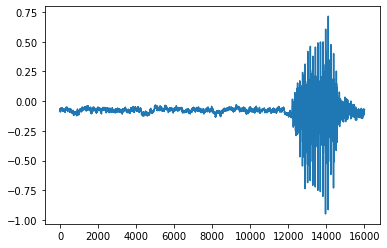

In [ ]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.plot(waveform.t().numpy());

In [ ]:
labels = sorted(list(set(datapoint[2] for datapoint in TrainNew)))
labels


['backward',
 'bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'follow',
 'forward',
 'four',
 'go',
 'happy',
 'house',
 'learn',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'visual',
 'wow',
 'yes',
 'zero']

In [ ]:
new_sample_rate = 8000
transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
transformed = transform(waveform)

ipd.Audio(transformed.numpy(), rate=new_sample_rate)

In [ ]:
def label_to_index(word):
    # Return the position of the word in labels
    return torch.tensor(labels.index(word))


def index_to_label(index):
    # Return the word corresponding to the index in labels
    # This is the inverse of label_to_index
    return labels[index]


word_start = "yes"
index = label_to_index(word_start)
word_recovered = index_to_label(index)

print(word_start, "-->", index, "-->", word_recovered)

yes --> tensor(33) --> yes


In [ ]:
def pad_sequence(batch):
    # Make all tensor in a batch the same length by padding with zeros
    batch = [item.t() for item in batch]
    batch = torch.nn.utils.rnn.pad_sequence(batch, batch_first=True, padding_value=0.)
    return batch.permute(0, 2, 1)


def collate_fn(batch):

    # A data tuple has the form:
    # waveform, sample_rate, label, speaker_id, utterance_number

    tensors, targets = [], []

    # Gather in lists, and encode labels as indices
    for waveform, _, label, *_ in batch:
        tensors += [waveform]
        targets += [label_to_index(label)]

    # Group the list of tensors into a batched tensor
    tensors = pad_sequence(tensors)
    targets = torch.stack(targets)

    return tensors, targets


batch_size = 256

if device == "cuda":
    num_workers = 1
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

train_loader = torch.utils.data.DataLoader(
    TrainNew,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)
test_loader = torch.utils.data.DataLoader(
    TestNew,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

In [ ]:
def train(model, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output = model(data)
        # print("out------",output)
        # print("size----",output.shape)
        # negative log-likelihood for a tensor of size (batch x 1 x n_output)
        loss = F.nll_loss(output.squeeze(), target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print training stats
        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

        # update progress bar
        pbar.update(pbar_update)
        # record loss
        losses.append(loss.item())

In [ ]:
def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)


def test(model, epoch):
    model.eval()
    correct = 0
    for data, target in test_loader:

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output = model(data)

        pred = get_likely_index(output)
        correct += number_of_correct(pred, target)

        # update progress bar
        pbar.update(pbar_update)

    print(f"\nTest Epoch: {epoch}\tAccuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")

In [ ]:
import torch



# using glorot initialization
def init_weights(m):
    if isinstance(m, torch.nn.Conv1d):
        torch.nn.init.xavier_uniform_(m.weight.data)


class CNN(torch.nn.Module):
    def __init__(self, channels, conv_kernels, conv_strides, conv_padding, pool_padding, num_classes=35):
        assert len(conv_kernels) == len(channels) == len(conv_strides) == len(conv_padding)
        super(CNN, self).__init__()
        # create conv blocks
        self.conv_blocks = torch.nn.ModuleList()
        prev_channel = 1
        for i in range(len(channels)):
            # add stacked conv layer
            block = []
            for j, conv_channel in enumerate(channels[i]):
                block.append( torch.nn.Conv1d(in_channels = prev_channel, out_channels = conv_channel, kernel_size = conv_kernels[i], stride = conv_strides[i], padding = conv_padding[i]) )
                prev_channel = conv_channel
                # add batch norm layer
                block.append( torch.nn.BatchNorm1d(prev_channel) )
                # adding ReLU
                block.append( torch.nn.ReLU() )
            self.conv_blocks.append( torch.nn.Sequential(*block) )

        # create pool blocks
        self.pool_blocks = torch.nn.ModuleList()
        for i in range(len(pool_padding)):
            # adding Max Pool (drops dims by a factor of 4)
            self.pool_blocks.append( torch.nn.MaxPool1d(kernel_size = 4, stride = 4, padding = pool_padding[i]) )

        # global pooling
        self.global_pool = torch.nn.AdaptiveAvgPool1d(1)
        self.linear = torch.nn.Linear(prev_channel, num_classes)


    def forward(self, inwav):
        for i in range(len(self.conv_blocks)):
            # apply conv layer
            inwav = self.conv_blocks[i](inwav)
            # apply max_pool
            if i < len(self.pool_blocks): inwav = self.pool_blocks[i](inwav)
        # apply global pooling
        out = self.global_pool(inwav).squeeze()
        out = self.linear(out)
        return F.log_softmax(out)

m11 = CNN(channels = [[64], [64]*2, [128]*2, [256]*3, [512]*2],
          conv_kernels = [80, 3, 3, 3, 3],
          conv_strides = [4, 1, 1, 1, 1],
          conv_padding = [38, 1, 1, 1, 1],
          pool_padding = [0, 0, 0, 2])




In [ ]:
model = m11
model.to(device)
print(model)


CNN(
  (conv_blocks): ModuleList(
    (0): Sequential(
      (0): Conv1d(1, 64, kernel_size=(80,), stride=(4,), padding=(38,))
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (2): Sequential(
      (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,))
      (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)  # reduce the learning after 20 epochs by a factor of 10

In [ ]:
log_interval = 20
n_epoch = 40

pbar_update = 1 / (len(train_loader) + len(test_loader))
losses = []

# The transform needs to live on the same device as the model and the data.
transform = transform.to(device)
with tqdm(total=n_epoch) as pbar:
    for epoch in range(1, n_epoch + 1):
        train(model, epoch, log_interval)
        test(model, epoch)
        scheduler.step()
        # break

# Let's plot the training loss versus the number of iteration.
# plt.plot(losses);
# plt.title("training loss");

  0%|          | 0/40 [00:00<?, ?it/s]<ipython-input-18-62ccf8287257>:50: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
  0%|          | 0.047619047619047616/40 [00:08<1:35:25, 143.30s/it]

Train Epoch: 1 [0/12000 (0%)]	Loss: 3.578212


  1%|          | 0.38095238095238093/40 [00:10<03:27,  5.23s/it]

Train Epoch: 1 [5120/12000 (43%)]	Loss: 2.724292


  2%|▏         | 0.6984126984126977/40 [00:11<02:44,  4.19s/it]

Train Epoch: 1 [10240/12000 (85%)]	Loss: 2.001900


  3%|▎         | 1.015873015873014/40 [00:12<01:34,  2.43s/it] 


Test Epoch: 1	Accuracy: 1426/4000 (36%)

Train Epoch: 2 [0/12000 (0%)]	Loss: 1.959854


  3%|▎         | 1.3809523809523778/40 [00:13<02:38,  4.10s/it]

Train Epoch: 2 [5120/12000 (43%)]	Loss: 1.497971


  4%|▍         | 1.6984126984126942/40 [00:15<02:39,  4.17s/it]

Train Epoch: 2 [10240/12000 (85%)]	Loss: 1.164031


  5%|▌         | 2.0158730158730105/40 [00:15<01:21,  2.15s/it]


Test Epoch: 2	Accuracy: 2085/4000 (52%)

Train Epoch: 3 [0/12000 (0%)]	Loss: 1.239982


  6%|▌         | 2.3809523809523743/40 [00:17<02:28,  3.94s/it]

Train Epoch: 3 [5120/12000 (43%)]	Loss: 1.106957


  7%|▋         | 2.6984126984126906/40 [00:18<02:32,  4.09s/it]

Train Epoch: 3 [10240/12000 (85%)]	Loss: 0.835406


  8%|▊         | 3.015873015873007/40 [00:19<01:21,  2.21s/it] 


Test Epoch: 3	Accuracy: 2422/4000 (61%)

Train Epoch: 4 [0/12000 (0%)]	Loss: 0.696851


  8%|▊         | 3.3809523809523707/40 [00:20<02:22,  3.89s/it]

Train Epoch: 4 [5120/12000 (43%)]	Loss: 0.758461


  9%|▉         | 3.698412698412687/40 [00:22<02:29,  4.11s/it] 

Train Epoch: 4 [10240/12000 (85%)]	Loss: 0.686523


 10%|█         | 4.015873015873003/40 [00:22<01:19,  2.20s/it]


Test Epoch: 4	Accuracy: 2813/4000 (70%)

Train Epoch: 5 [0/12000 (0%)]	Loss: 0.600104


 11%|█         | 4.380952380952367/40 [00:24<02:21,  3.98s/it]

Train Epoch: 5 [5120/12000 (43%)]	Loss: 0.426505


 12%|█▏        | 4.6984126984126835/40 [00:25<02:29,  4.23s/it]

Train Epoch: 5 [10240/12000 (85%)]	Loss: 0.572504


 13%|█▎        | 5.015873015873/40 [00:26<01:24,  2.42s/it]   


Test Epoch: 5	Accuracy: 3033/4000 (76%)

Train Epoch: 6 [0/12000 (0%)]	Loss: 0.547053


 13%|█▎        | 5.349206349206332/40 [00:28<03:46,  6.52s/it]

Train Epoch: 6 [5120/12000 (43%)]	Loss: 0.543716


 14%|█▍        | 5.69841269841268/40 [00:30<02:34,  4.51s/it] 

Train Epoch: 6 [10240/12000 (85%)]	Loss: 0.516800


 15%|█▌        | 6.015873015872996/40 [00:30<01:16,  2.25s/it]


Test Epoch: 6	Accuracy: 3119/4000 (78%)

Train Epoch: 7 [0/12000 (0%)]	Loss: 0.429135


 16%|█▌        | 6.38095238095236/40 [00:32<02:11,  3.90s/it] 

Train Epoch: 7 [5120/12000 (43%)]	Loss: 0.547540


 17%|█▋        | 6.698412698412676/40 [00:33<02:16,  4.10s/it]

Train Epoch: 7 [10240/12000 (85%)]	Loss: 0.377882


 18%|█▊        | 7.015873015872993/40 [00:34<01:12,  2.20s/it] 


Test Epoch: 7	Accuracy: 3092/4000 (77%)

Train Epoch: 8 [0/12000 (0%)]	Loss: 0.320810


 18%|█▊        | 7.3809523809523565/40 [00:35<02:08,  3.93s/it]

Train Epoch: 8 [5120/12000 (43%)]	Loss: 0.327952


 19%|█▉        | 7.698412698412673/40 [00:37<02:13,  4.13s/it]

Train Epoch: 8 [10240/12000 (85%)]	Loss: 0.323798


 20%|██        | 8.01587301587299/40 [00:37<01:10,  2.20s/it] 


Test Epoch: 8	Accuracy: 3171/4000 (79%)

Train Epoch: 9 [0/12000 (0%)]	Loss: 0.286772


 21%|██        | 8.365079365079337/40 [00:39<02:08,  4.05s/it]

Train Epoch: 9 [5120/12000 (43%)]	Loss: 0.241760


 22%|██▏       | 8.682539682539653/40 [00:40<02:12,  4.22s/it]

Train Epoch: 9 [10240/12000 (85%)]	Loss: 0.281023


 23%|██▎       | 9.031746031746001/40 [00:41<01:14,  2.40s/it]


Test Epoch: 9	Accuracy: 3028/4000 (76%)

Train Epoch: 10 [0/12000 (0%)]	Loss: 0.246591


 23%|██▎       | 9.38095238095235/40 [00:43<02:01,  3.98s/it] 

Train Epoch: 10 [5120/12000 (43%)]	Loss: 0.211796


 24%|██▍       | 9.698412698412666/40 [00:44<02:05,  4.13s/it]

Train Epoch: 10 [10240/12000 (85%)]	Loss: 0.214548


 25%|██▌       | 10.015873015872982/40 [00:45<01:07,  2.25s/it]


Test Epoch: 10	Accuracy: 3073/4000 (77%)

Train Epoch: 11 [0/12000 (0%)]	Loss: 0.295546


 26%|██▌       | 10.380952380952346/40 [00:46<01:56,  3.94s/it]

Train Epoch: 11 [5120/12000 (43%)]	Loss: 0.223905


 27%|██▋       | 10.698412698412662/40 [00:47<02:01,  4.15s/it]

Train Epoch: 11 [10240/12000 (85%)]	Loss: 0.260127


 28%|██▊       | 11.015873015872979/40 [00:48<01:04,  2.23s/it]


Test Epoch: 11	Accuracy: 3198/4000 (80%)

Train Epoch: 12 [0/12000 (0%)]	Loss: 0.182781


 28%|██▊       | 11.380952380952342/40 [00:50<01:53,  3.96s/it]

Train Epoch: 12 [5120/12000 (43%)]	Loss: 0.157298


 29%|██▉       | 11.698412698412659/40 [00:51<01:57,  4.14s/it]

Train Epoch: 12 [10240/12000 (85%)]	Loss: 0.162256


 30%|███       | 12.015873015872975/40 [00:52<01:01,  2.20s/it]


Test Epoch: 12	Accuracy: 3312/4000 (83%)

Train Epoch: 13 [0/12000 (0%)]	Loss: 0.122480


 31%|███       | 12.365079365079323/40 [00:53<01:53,  4.10s/it]

Train Epoch: 13 [5120/12000 (43%)]	Loss: 0.133632


 32%|███▏      | 12.68253968253964/40 [00:55<01:57,  4.30s/it] 

Train Epoch: 13 [10240/12000 (85%)]	Loss: 0.158654


 33%|███▎      | 13.031746031745987/40 [00:55<01:01,  2.29s/it]


Test Epoch: 13	Accuracy: 3161/4000 (79%)

Train Epoch: 14 [0/12000 (0%)]	Loss: 0.148688


 33%|███▎      | 13.380952380952335/40 [00:57<01:45,  3.97s/it]

Train Epoch: 14 [5120/12000 (43%)]	Loss: 0.175199


 34%|███▍      | 13.698412698412652/40 [00:58<01:49,  4.15s/it]

Train Epoch: 14 [10240/12000 (85%)]	Loss: 0.158523


 35%|███▌      | 14.015873015872968/40 [00:59<00:58,  2.25s/it]


Test Epoch: 14	Accuracy: 3306/4000 (83%)

Train Epoch: 15 [0/12000 (0%)]	Loss: 0.119438


 36%|███▌      | 14.380952380952332/40 [01:00<01:41,  3.96s/it]

Train Epoch: 15 [5120/12000 (43%)]	Loss: 0.106450


 37%|███▋      | 14.698412698412648/40 [01:02<01:45,  4.16s/it]

Train Epoch: 15 [10240/12000 (85%)]	Loss: 0.145783


 38%|███▊      | 15.015873015872964/40 [01:03<00:55,  2.21s/it]


Test Epoch: 15	Accuracy: 3313/4000 (83%)

Train Epoch: 16 [0/12000 (0%)]	Loss: 0.122270


 38%|███▊      | 15.380952380952328/40 [01:04<01:37,  3.97s/it]

Train Epoch: 16 [5120/12000 (43%)]	Loss: 0.139106


 39%|███▉      | 15.698412698412644/40 [01:05<01:42,  4.22s/it]

Train Epoch: 16 [10240/12000 (85%)]	Loss: 0.096329


 40%|████      | 16.015873015872963/40 [01:06<00:58,  2.45s/it]


Test Epoch: 16	Accuracy: 3250/4000 (81%)

Train Epoch: 17 [0/12000 (0%)]	Loss: 0.052317


 41%|████      | 16.380952380952326/40 [01:08<01:39,  4.22s/it]

Train Epoch: 17 [5120/12000 (43%)]	Loss: 0.065008


 42%|████▏     | 16.698412698412643/40 [01:09<01:37,  4.20s/it]

Train Epoch: 17 [10240/12000 (85%)]	Loss: 0.076345


 43%|████▎     | 17.01587301587296/40 [01:10<00:51,  2.23s/it] 


Test Epoch: 17	Accuracy: 3345/4000 (84%)

Train Epoch: 18 [0/12000 (0%)]	Loss: 0.060738


 43%|████▎     | 17.380952380952323/40 [01:11<01:30,  4.01s/it]

Train Epoch: 18 [5120/12000 (43%)]	Loss: 0.057438


 44%|████▍     | 17.69841269841264/40 [01:13<01:33,  4.21s/it] 

Train Epoch: 18 [10240/12000 (85%)]	Loss: 0.125170


 45%|████▌     | 18.015873015872955/40 [01:13<00:49,  2.25s/it]


Test Epoch: 18	Accuracy: 3311/4000 (83%)

Train Epoch: 19 [0/12000 (0%)]	Loss: 0.056839


 46%|████▌     | 18.38095238095232/40 [01:15<01:26,  3.99s/it]

Train Epoch: 19 [5120/12000 (43%)]	Loss: 0.021580


 47%|████▋     | 18.698412698412636/40 [01:16<01:29,  4.20s/it]

Train Epoch: 19 [10240/12000 (85%)]	Loss: 0.057585


 48%|████▊     | 19.015873015872952/40 [01:17<00:47,  2.25s/it]


Test Epoch: 19	Accuracy: 3278/4000 (82%)

Train Epoch: 20 [0/12000 (0%)]	Loss: 0.062770


 48%|████▊     | 19.380952380952316/40 [01:19<01:22,  4.02s/it]

Train Epoch: 20 [5120/12000 (43%)]	Loss: 0.054989


 49%|████▉     | 19.698412698412632/40 [01:20<01:27,  4.32s/it]

Train Epoch: 20 [10240/12000 (85%)]	Loss: 0.035224


 50%|█████     | 20.01587301587295/40 [01:21<00:48,  2.42s/it] 


Test Epoch: 20	Accuracy: 3343/4000 (84%)

Train Epoch: 21 [0/12000 (0%)]	Loss: 0.044034


 51%|█████     | 20.380952380952312/40 [01:22<01:23,  4.25s/it]

Train Epoch: 21 [5120/12000 (43%)]	Loss: 0.025985


 52%|█████▏    | 20.69841269841263/40 [01:24<01:21,  4.22s/it] 

Train Epoch: 21 [10240/12000 (85%)]	Loss: 0.025709


 53%|█████▎    | 21.015873015872945/40 [01:24<00:42,  2.23s/it]


Test Epoch: 21	Accuracy: 3488/4000 (87%)

Train Epoch: 22 [0/12000 (0%)]	Loss: 0.035510


 53%|█████▎    | 21.38095238095231/40 [01:26<01:15,  4.03s/it]

Train Epoch: 22 [5120/12000 (43%)]	Loss: 0.018383


 54%|█████▍    | 21.698412698412625/40 [01:27<01:17,  4.23s/it]

Train Epoch: 22 [10240/12000 (85%)]	Loss: 0.039381


 55%|█████▌    | 22.01587301587294/40 [01:28<00:40,  2.24s/it] 


Test Epoch: 22	Accuracy: 3492/4000 (87%)

Train Epoch: 23 [0/12000 (0%)]	Loss: 0.029393


 56%|█████▌    | 22.380952380952305/40 [01:29<01:14,  4.22s/it]

Train Epoch: 23 [5120/12000 (43%)]	Loss: 0.015924


 57%|█████▋    | 22.69841269841262/40 [01:31<01:13,  4.25s/it]

Train Epoch: 23 [10240/12000 (85%)]	Loss: 0.011176


 58%|█████▊    | 23.015873015872938/40 [01:32<00:37,  2.24s/it]


Test Epoch: 23	Accuracy: 3491/4000 (87%)

Train Epoch: 24 [0/12000 (0%)]	Loss: 0.015752


 58%|█████▊    | 23.365079365079286/40 [01:33<01:08,  4.13s/it]

Train Epoch: 24 [5120/12000 (43%)]	Loss: 0.005851


 59%|█████▉    | 23.682539682539602/40 [01:34<01:10,  4.33s/it]

Train Epoch: 24 [10240/12000 (85%)]	Loss: 0.015871


 60%|██████    | 24.03174603174595/40 [01:35<00:38,  2.42s/it] 


Test Epoch: 24	Accuracy: 3503/4000 (88%)

Train Epoch: 25 [0/12000 (0%)]	Loss: 0.006890


 61%|██████    | 24.380952380952298/40 [01:37<01:04,  4.12s/it]

Train Epoch: 25 [5120/12000 (43%)]	Loss: 0.006107


 62%|██████▏   | 24.698412698412614/40 [01:38<01:05,  4.28s/it]

Train Epoch: 25 [10240/12000 (85%)]	Loss: 0.022126


 63%|██████▎   | 25.01587301587293/40 [01:39<00:34,  2.28s/it] 


Test Epoch: 25	Accuracy: 3500/4000 (88%)

Train Epoch: 26 [0/12000 (0%)]	Loss: 0.007007


 63%|██████▎   | 25.380952380952294/40 [01:41<01:00,  4.16s/it]

Train Epoch: 26 [5120/12000 (43%)]	Loss: 0.012904


 64%|██████▍   | 25.69841269841261/40 [01:42<01:00,  4.25s/it]

Train Epoch: 26 [10240/12000 (85%)]	Loss: 0.010823


 65%|██████▌   | 26.015873015872927/40 [01:43<00:31,  2.24s/it]


Test Epoch: 26	Accuracy: 3499/4000 (87%)

Train Epoch: 27 [0/12000 (0%)]	Loss: 0.015842


 66%|██████▌   | 26.38095238095229/40 [01:44<00:55,  4.08s/it] 

Train Epoch: 27 [5120/12000 (43%)]	Loss: 0.018328


 67%|██████▋   | 26.698412698412607/40 [01:45<00:56,  4.26s/it]

Train Epoch: 27 [10240/12000 (85%)]	Loss: 0.015488


 68%|██████▊   | 27.015873015872923/40 [01:46<00:31,  2.41s/it]


Test Epoch: 27	Accuracy: 3497/4000 (87%)

Train Epoch: 28 [0/12000 (0%)]	Loss: 0.020992


 68%|██████▊   | 27.380952380952287/40 [01:48<00:53,  4.27s/it]

Train Epoch: 28 [5120/12000 (43%)]	Loss: 0.011587


 69%|██████▉   | 27.698412698412604/40 [01:49<00:53,  4.39s/it]

Train Epoch: 28 [10240/12000 (85%)]	Loss: 0.030713


 70%|███████   | 28.01587301587292/40 [01:50<00:27,  2.29s/it] 


Test Epoch: 28	Accuracy: 3509/4000 (88%)

Train Epoch: 29 [0/12000 (0%)]	Loss: 0.005637


 71%|███████   | 28.380952380952284/40 [01:52<00:48,  4.15s/it]

Train Epoch: 29 [5120/12000 (43%)]	Loss: 0.012904


 72%|███████▏  | 28.6984126984126/40 [01:53<00:48,  4.25s/it] 

Train Epoch: 29 [10240/12000 (85%)]	Loss: 0.026177


 73%|███████▎  | 29.015873015872916/40 [01:54<00:24,  2.25s/it]


Test Epoch: 29	Accuracy: 3502/4000 (88%)

Train Epoch: 30 [0/12000 (0%)]	Loss: 0.004299


 73%|███████▎  | 29.38095238095228/40 [01:55<00:42,  4.04s/it] 

Train Epoch: 30 [5120/12000 (43%)]	Loss: 0.004754


 74%|███████▍  | 29.698412698412596/40 [01:57<00:43,  4.25s/it]

Train Epoch: 30 [10240/12000 (85%)]	Loss: 0.011191


 75%|███████▌  | 30.015873015872913/40 [01:57<00:22,  2.25s/it]


Test Epoch: 30	Accuracy: 3512/4000 (88%)

Train Epoch: 31 [0/12000 (0%)]	Loss: 0.023153


 76%|███████▌  | 30.380952380952277/40 [01:59<00:39,  4.08s/it]

Train Epoch: 31 [5120/12000 (43%)]	Loss: 0.003375


 77%|███████▋  | 30.698412698412593/40 [02:00<00:40,  4.39s/it]

Train Epoch: 31 [10240/12000 (85%)]	Loss: 0.003186


 78%|███████▊  | 31.01587301587291/40 [02:01<00:21,  2.40s/it] 


Test Epoch: 31	Accuracy: 3502/4000 (88%)

Train Epoch: 32 [0/12000 (0%)]	Loss: 0.006360


 78%|███████▊  | 31.380952380952273/40 [02:03<00:37,  4.29s/it]

Train Epoch: 32 [5120/12000 (43%)]	Loss: 0.022817


 79%|███████▉  | 31.69841269841259/40 [02:04<00:35,  4.25s/it] 

Train Epoch: 32 [10240/12000 (85%)]	Loss: 0.002998


 80%|████████  | 32.015873015872906/40 [02:05<00:18,  2.26s/it]


Test Epoch: 32	Accuracy: 3506/4000 (88%)

Train Epoch: 33 [0/12000 (0%)]	Loss: 0.005210


 81%|████████  | 32.38095238095235/40 [02:06<00:31,  4.17s/it]

Train Epoch: 33 [5120/12000 (43%)]	Loss: 0.014999


 82%|████████▏ | 32.69841269841274/40 [02:08<00:31,  4.25s/it]

Train Epoch: 33 [10240/12000 (85%)]	Loss: 0.005462


 83%|████████▎ | 33.015873015873126/40 [02:08<00:15,  2.26s/it]


Test Epoch: 33	Accuracy: 3503/4000 (88%)

Train Epoch: 34 [0/12000 (0%)]	Loss: 0.004408


 83%|████████▎ | 33.38095238095257/40 [02:10<00:27,  4.18s/it]

Train Epoch: 34 [5120/12000 (43%)]	Loss: 0.005608


 84%|████████▍ | 33.69841269841296/40 [02:11<00:27,  4.29s/it]

Train Epoch: 34 [10240/12000 (85%)]	Loss: 0.010934


 85%|████████▌ | 34.015873015873346/40 [02:12<00:13,  2.26s/it]


Test Epoch: 34	Accuracy: 3500/4000 (88%)

Train Epoch: 35 [0/12000 (0%)]	Loss: 0.014808


 86%|████████▌ | 34.38095238095279/40 [02:13<00:23,  4.24s/it]

Train Epoch: 35 [5120/12000 (43%)]	Loss: 0.007343


 87%|████████▋ | 34.69841269841318/40 [02:15<00:23,  4.39s/it]

Train Epoch: 35 [10240/12000 (85%)]	Loss: 0.009223


 88%|████████▊ | 35.01587301587357/40 [02:16<00:12,  2.44s/it]


Test Epoch: 35	Accuracy: 3492/4000 (87%)

Train Epoch: 36 [0/12000 (0%)]	Loss: 0.010067


 88%|████████▊ | 35.38095238095301/40 [02:17<00:19,  4.17s/it]

Train Epoch: 36 [5120/12000 (43%)]	Loss: 0.003314


 89%|████████▉ | 35.6984126984134/40 [02:19<00:18,  4.26s/it] 

Train Epoch: 36 [10240/12000 (85%)]	Loss: 0.003075


 90%|█████████ | 36.01587301587379/40 [02:19<00:09,  2.30s/it]


Test Epoch: 36	Accuracy: 3508/4000 (88%)

Train Epoch: 37 [0/12000 (0%)]	Loss: 0.009554


 91%|█████████ | 36.38095238095323/40 [02:21<00:15,  4.19s/it]

Train Epoch: 37 [5120/12000 (43%)]	Loss: 0.002644


 92%|█████████▏| 36.69841269841362/40 [02:22<00:14,  4.28s/it]

Train Epoch: 37 [10240/12000 (85%)]	Loss: 0.010444


 93%|█████████▎| 37.01587301587401/40 [02:23<00:06,  2.27s/it]


Test Epoch: 37	Accuracy: 3504/4000 (88%)

Train Epoch: 38 [0/12000 (0%)]	Loss: 0.002778


 93%|█████████▎| 37.38095238095345/40 [02:25<00:10,  4.17s/it] 

Train Epoch: 38 [5120/12000 (43%)]	Loss: 0.014213


 94%|█████████▍| 37.69841269841384/40 [02:26<00:10,  4.35s/it]

Train Epoch: 38 [10240/12000 (85%)]	Loss: 0.002246


 95%|█████████▌| 38.01587301587423/40 [02:27<00:04,  2.32s/it]


Test Epoch: 38	Accuracy: 3500/4000 (88%)

Train Epoch: 39 [0/12000 (0%)]	Loss: 0.003085


 96%|█████████▌| 38.38095238095367/40 [02:28<00:06,  4.30s/it] 

Train Epoch: 39 [5120/12000 (43%)]	Loss: 0.005276


 97%|█████████▋| 38.69841269841406/40 [02:30<00:05,  4.49s/it]

Train Epoch: 39 [10240/12000 (85%)]	Loss: 0.014582


 98%|█████████▊| 39.01587301587445/40 [02:30<00:02,  2.32s/it]


Test Epoch: 39	Accuracy: 3501/4000 (88%)

Train Epoch: 40 [0/12000 (0%)]	Loss: 0.005911


 98%|█████████▊| 39.38095238095389/40 [02:32<00:02,  4.20s/it] 

Train Epoch: 40 [5120/12000 (43%)]	Loss: 0.004347


 99%|█████████▉| 39.69841269841428/40 [02:33<00:01,  4.31s/it]

Train Epoch: 40 [10240/12000 (85%)]	Loss: 0.003176


100%|█████████▉| 39.95238095238259/40 [02:34<00:00,  2.25s/it]/usr/local/lib/python3.8/dist-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 40.00000000000165/40 [02:34<00:00,  3.86s/it]


Test Epoch: 40	Accuracy: 3499/4000 (87%)

